In [48]:
# import necessary librariies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt   
%matplotlib inline

In [49]:
#Load dataset
df = pd.read_csv('https://github.com/HamoyeHQ/HDSC-Time-series-analysis-and-forecast/files/7768846/Time_series_analysis_and_forecast_DATASET.csv')
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [50]:
df.shape

(92016, 5)

In [51]:
df.dtypes


FullDate      object
Tmax         float64
SysLoad      float64
GasPrice     float64
ElecPrice    float64
dtype: object

In [52]:
#check for missing values
df.isnull().values.any()

False

In [53]:
df.isnull().sum()


FullDate     0
Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

In [54]:
df.describe()


,Tmax,SysLoad,GasPrice,ElecPrice
count,92016.000000,92016.000000,92016.000000,92016.000000
mean,231.696688,797.623357,6.016163,65.798356
std,4562.128748,613.520156,2.608116,213.144084
min,9.900000,-1596.810100,0.000000,-924.820000
25%,17.300000,417.119800,3.936900,31.543750
50%,21.900000,856.467925,5.165600,48.715000
75%,27.600000,1221.293675,8.023300,76.495000
max,99999.900000,3264.166300,29.990000,14700.000000


In [55]:
# Convert to a time series object - 'FullDate' to 'DateTime' 
from datetime import datetime
df['FullDate'] = pd.to_datetime(df.FullDate)

# Rename the Columns FullDate And ElecPrice
df = df.rename(columns={"FullDate" : "ds" , "ElecPrice" : "y" }) 
df.set_index('ds', inplace=True)
df.head()

,Tmax,SysLoad,GasPrice,y
ds,,,,
2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [56]:
# Resampling from Hourly to Daily data points
df_daily = df.resample('D').sum()

In [57]:
df_daily.corr()


,Tmax,SysLoad,GasPrice,y
Tmax,1.000000,-0.012249,0.030173,0.004748
SysLoad,-0.012249,1.000000,-0.268321,0.170524
GasPrice,0.030173,-0.268321,1.000000,0.352420
y,0.004748,0.170524,0.352420,1.000000


In [58]:
# Looking at the shape of Daily Rate
df_daily.shape

(3834, 4)

Text(0, 0.5, 'ElecPrice')

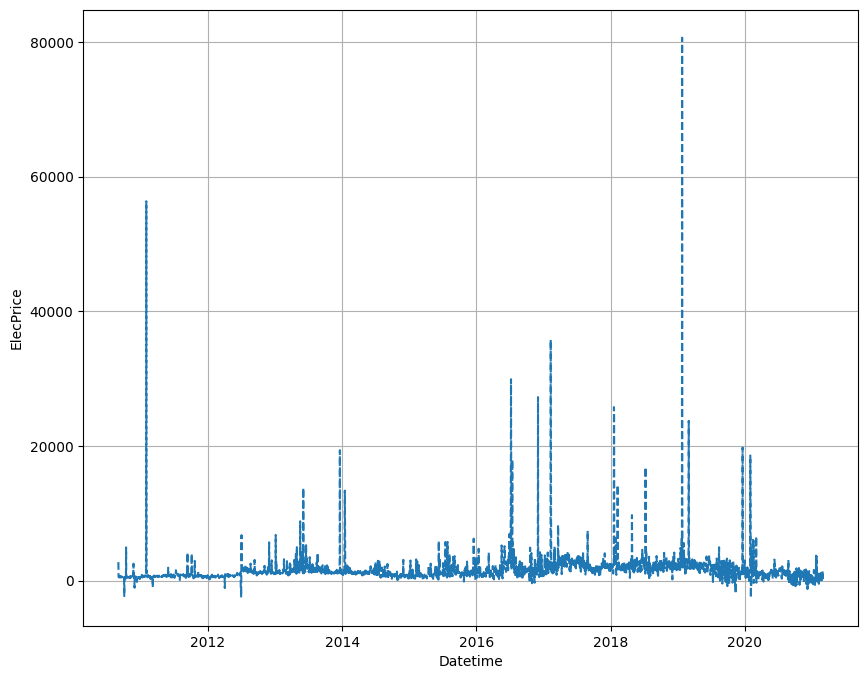

In [59]:
#plot of the daily global_active_power over time
plt.figure(figsize=(10,8))
plt.plot(df_daily.index, df_daily.y, '--')
plt.grid()
plt.xlabel('Datetime')
plt.ylabel('ElecPrice')

In [60]:
#Importing the ADF library
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

adf_sysload = adfuller(df_daily['SysLoad'])
adf_gasprice = adfuller(df_daily['GasPrice'])
print(f'p-value of the SysLoad: {round(adf_sysload[1],6)}')
print(f'p-value of the GasPrice: {round(adf_gasprice[1],6)}')

p-value of the SysLoad: 0.004254
p-value of the GasPrice: 0.045027


In [61]:
# Critical Values of GasPrice
adf_gasprice = adfuller(df_daily['GasPrice'])
print(f'ADF Statistic: {round(adf_gasprice[0],4)}')
print('Critical Values:')
for k, v in adf_gasprice[4].items():
  print(f'   {k}: {v}')

ADF Statistic: -2.9028
Critical Values:
   1%: -3.4320693157877544
   5%: -2.8622996992165364
   10%: -2.5671743978048323


In [62]:
# Critical Values of ElecPrice
adf_elecprice = adfuller(df_daily['y'])
print(f'ADF Statistic: {round(adf_elecprice[0],4)}')
print('Critical Values:')

for k, v in adf_elecprice[4].items():
 print(f'{k} : {v}') 

ADF Statistic: -8.2691
Critical Values:
1% : -3.432066157296446
5% : -2.8622983040036005
10% : -2.5671736550459663


In [63]:
# Rest the index
df_daily.reset_index(inplace=True)

In [64]:
#Split the dataset
train = df_daily.iloc[:2757,:]
test = df_daily.iloc[2757:,:]

In [65]:
train.shape


(2757, 5)

In [66]:
train.head()


,ds,Tmax,SysLoad,GasPrice,y
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [67]:
test.shape


(1077, 5)

In [68]:
test.head()


,ds,Tmax,SysLoad,GasPrice,y
2757,2018-03-20,540.0,7696.91130,201.5880,1833.00
2758,2018-03-21,571.2,4658.05865,203.2560,1730.49
2759,2018-03-22,722.4,19161.78525,203.2560,2260.55
2760,2018-03-23,811.2,18090.43435,198.6456,2138.76
2761,2018-03-24,832.8,3763.53865,180.2160,1721.70


In [69]:
# Defining the MAPE function
def mape(y, yhat):
  y = y.reset_index(drop=True)
  return round(np.mean(np.abs((y - yhat)/y)*100),2)

In [70]:
!conda install -c conda-forge fbprophet -y
!pip install --upgrade plotly


/bin/bash: conda: command not found
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [71]:
from prophet import Prophet
# fit train data to fb prophet model
model_1 = Prophet()
model_1.fit(train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdcrosz3x/8egkcttc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdcrosz3x/r3i5abuv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24871', 'data', 'file=/tmp/tmpdcrosz3x/8egkcttc.json', 'init=/tmp/tmpdcrosz3x/r3i5abuv.json', 'output', 'file=/tmp/tmpdcrosz3x/prophet_modellhoeqw7j/prophet_model-20230404215651.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:56:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:56:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [72]:
pred1 = model_1.predict(test) 
mape(test['y'],pred1['yhat'])

546.46

In [73]:
# Defining the RMSE function
def rmse(y, yhat):
  y = y.reset_index(drop=True)
  return round(np.sqrt(np.mean(np.square(y - yhat))),2)

In [74]:
rmse(test['y'], pred1['yhat'])


3211.82

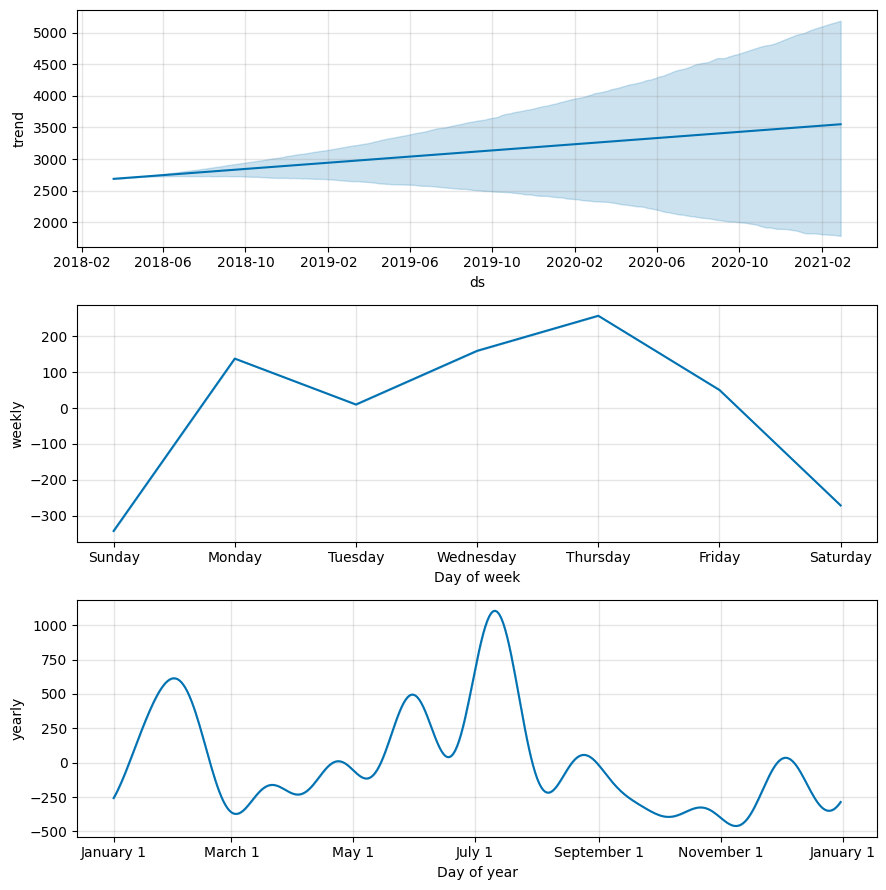

In [75]:
model_1.plot_components(pred1) 
plt.show()

In [76]:
#For questions 17 to 19, rename the 3 independent variables [‘SysLoad’,’Tmax’,’GasPrice’'] 
#to [‘add1’, ‘add2’, ‘add3’’] respectively, as the regressors

#Rename "SysLoad", "Tmax", and "GasPrice" to "add1", "add2", and "add3" respectively
new_df = df_daily.rename(columns={"SysLoad" : "add1" , "Tmax" : "add2", "GasPrice" : "add3" })
new_df.head()

,ds,add2,add1,add3,y
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [77]:
# assign train and test data
train2 = new_df[:2757]
test2 = new_df[2757:]
print('train shape', train2.shape)
print('test shape', test2.shape)

train shape (2757, 5)
test shape (1077, 5)


In [78]:
#Create multivariate model
model2 = Prophet()

model2.add_regressor('add1')
model2.add_regressor('add2')
model2.add_regressor('add3')

In [79]:
model2.fit(train2)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdcrosz3x/0eyaemqi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdcrosz3x/gogjyjme.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76685', 'data', 'file=/tmp/tmpdcrosz3x/0eyaemqi.json', 'init=/tmp/tmpdcrosz3x/gogjyjme.json', 'output', 'file=/tmp/tmpdcrosz3x/prophet_model3ztboat4/prophet_model-20230404215653.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:56:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:56:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [80]:
#Evaluate MAPE on the test set
pred2 = model2.predict(test2) 
mape(test['y'],pred2['yhat'])

232.73

In [81]:
#RMSE on test set
rmse(test2['y'],pred2['yhat'])

2708.53

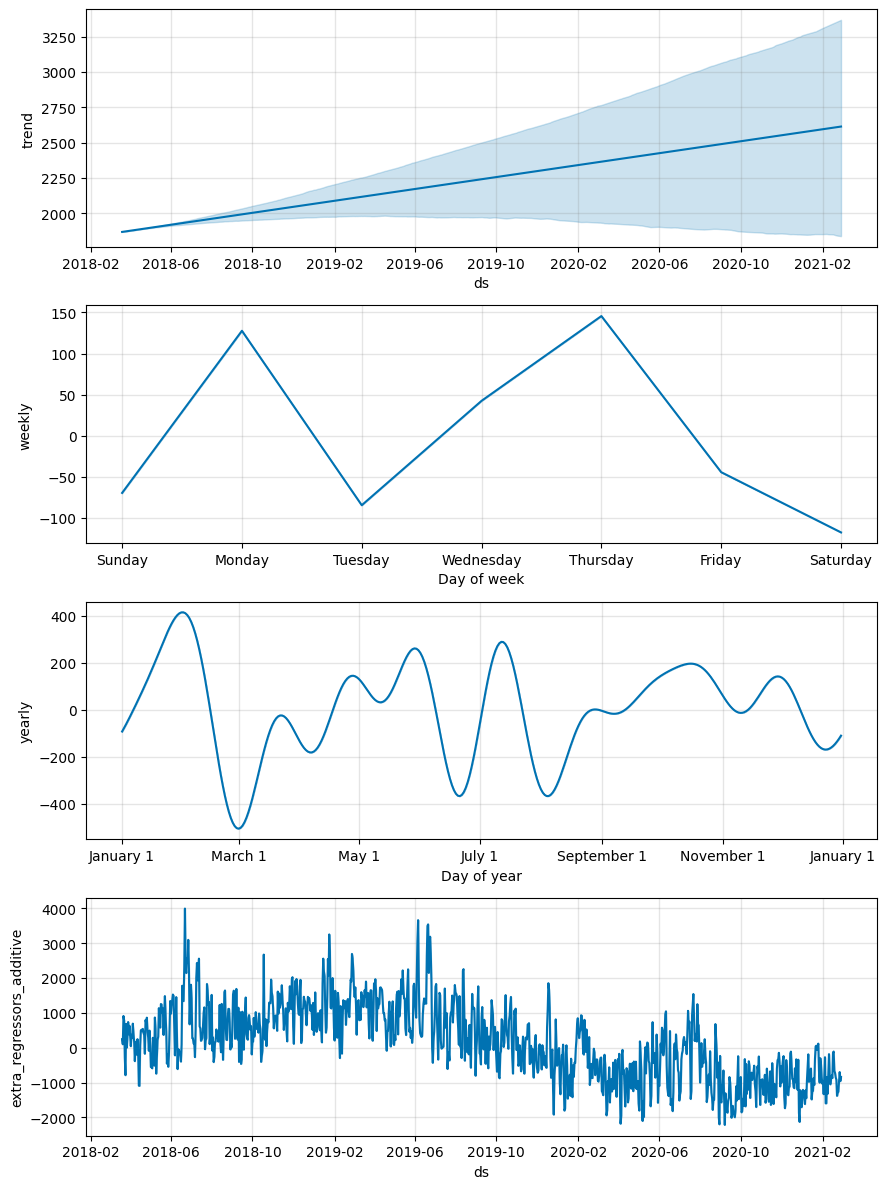

In [82]:
model2.plot_components(pred2) 
plt.show()

In [83]:
# Split the dataset
train3 = new_df.iloc[:2757,:]
test3 = new_df.iloc[2757:,:]
train3.shape , test3.shape

((2757, 5), (1077, 5))

In [84]:
#Training a forecast model without 'Tmax' 
model_3 = Prophet()
model_3.add_regressor('add1')
model_3.add_regressor('add3')

In [85]:
model_3.fit(train3)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdcrosz3x/hemu7hzk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdcrosz3x/5e4dnfky.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50258', 'data', 'file=/tmp/tmpdcrosz3x/hemu7hzk.json', 'init=/tmp/tmpdcrosz3x/5e4dnfky.json', 'output', 'file=/tmp/tmpdcrosz3x/prophet_modelivacnh5k/prophet_model-20230404215655.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:56:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:56:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [86]:
pred3 = model_3.predict(test3) 
mape(test3['y'],pred3['yhat'])

232.84

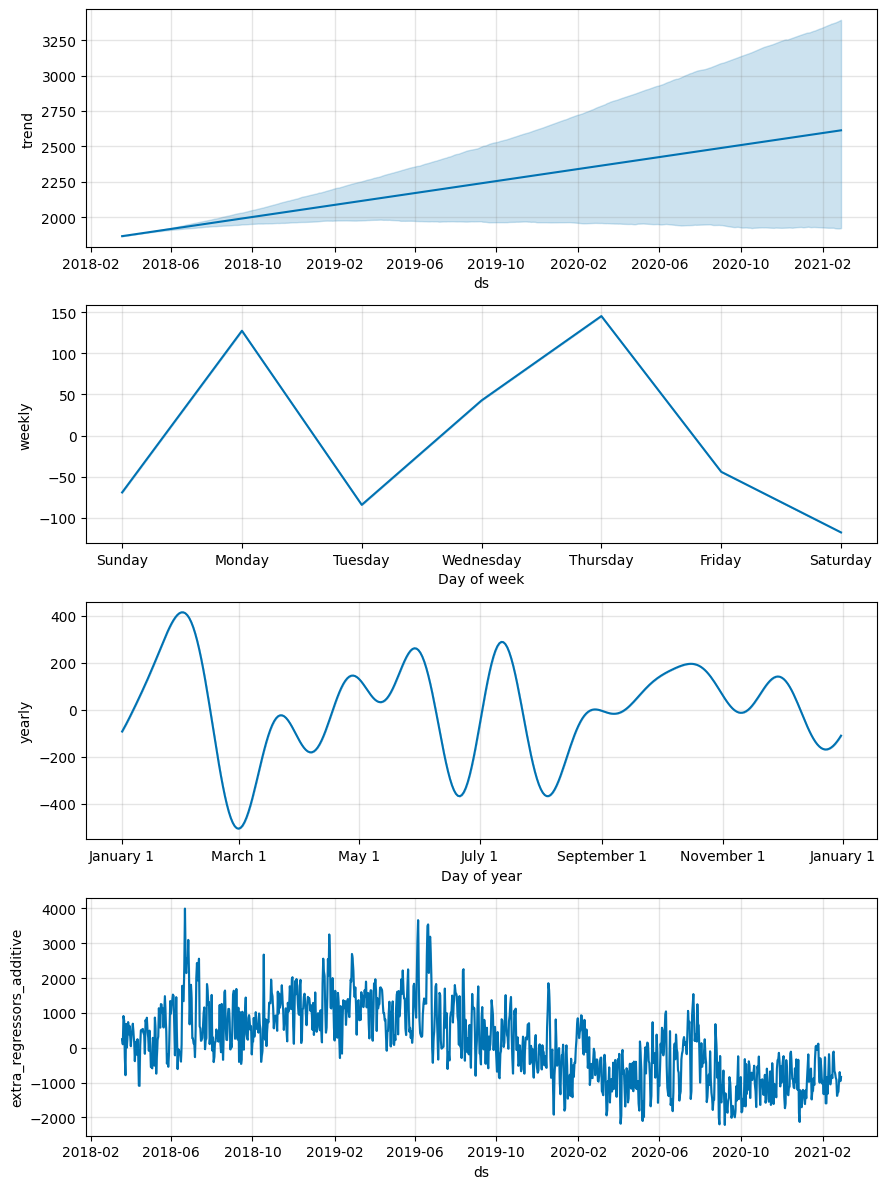

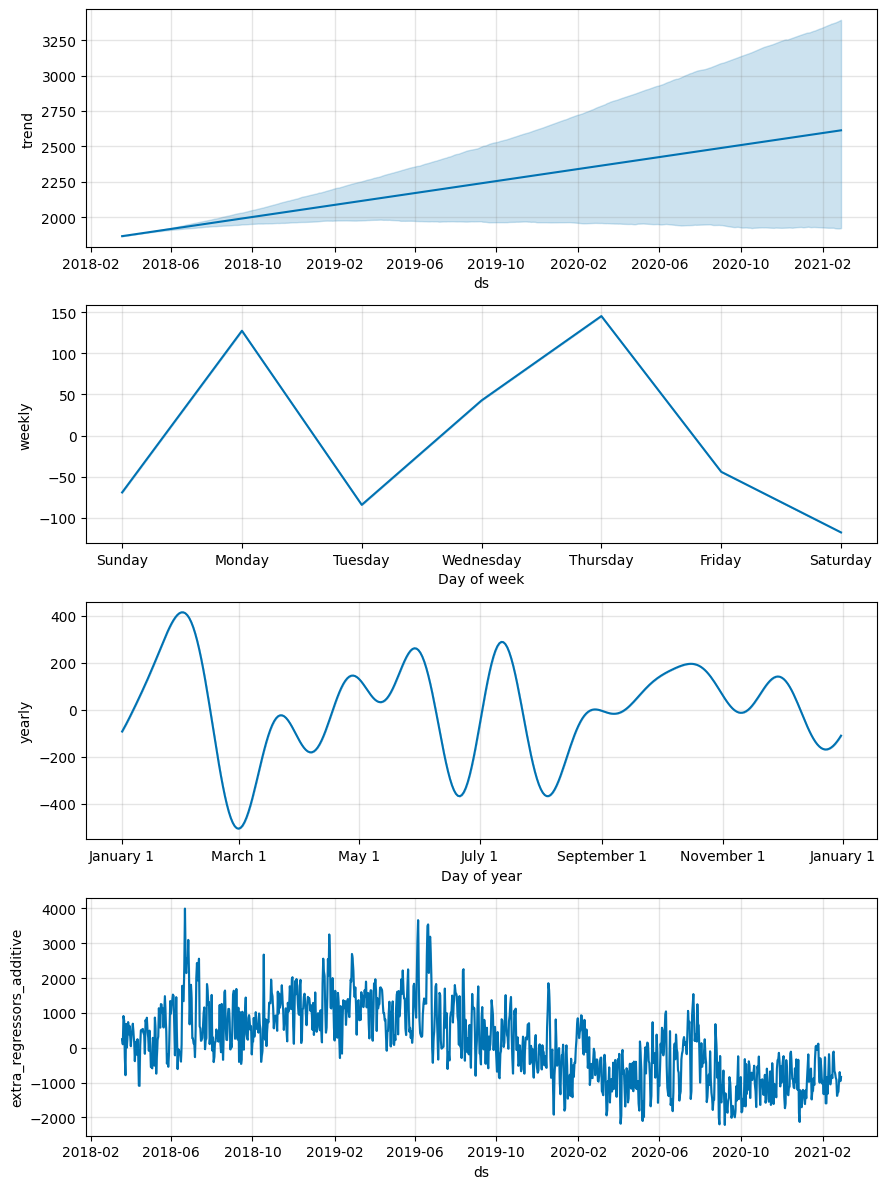

In [87]:
model_3.plot_components(pred3)
